In [21]:
import pprint

In [2]:
from groq import Groq
import base64
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Initialize Groq client with API key
client = Groq(api_key=os.getenv("GROQ_API_KEY"))

In [3]:
def analyze_ingredient(image_bytes):
    # Convert the image to base64
    base64_image = base64.b64encode(image_bytes).decode('utf-8')

    # Send request to Groq API to identify ingredients
    response = client.chat.completions.create(
        model="llama-3.2-11b-vision-preview",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                     "type": "text",
                     "text": "Identify the ingredients in this image. 'Only the ingredients' comma separated and nothing else."
                  },
                    {
                     "type": "image_url",
                     "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                     }
                  }
                ]
            }
        ],
        stream=False,
        temperature=1,
        max_tokens=1024,
        top_p=1,
        stop=None,
    )

    return response.choices[0].message.content


In [18]:
def suggest_recipe(ingredients):
    # Send identified ingredients to Llama3.2 to get recipe suggestions
    response = client.chat.completions.create(
        # model="llama-3.2-11b-text-preview",
        model = "llama3-70b-8192",
        messages=[
            {"role": "user", "content": f"Suggest a recipe using these ingredients: {ingredients}"}
        ]
    )
    return response.choices[0].message.content

In [25]:
from IPython.display import Image, display

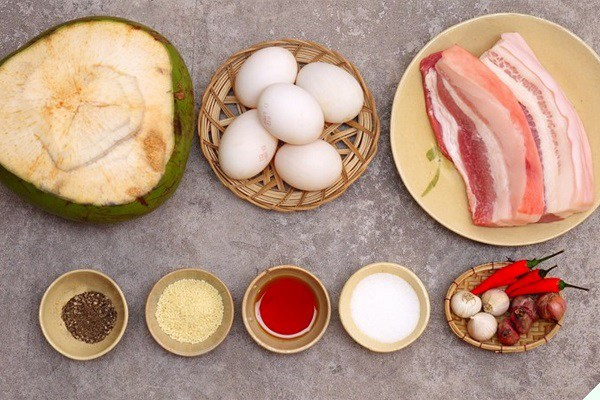

In [26]:
image_path = 'E:/projects/chefica/images/thit-kho-tau.jpg'
display(Image(filename=image_path))


In [27]:
# Open the image file in binary mode
with open(image_path, 'rb') as image_file:
    image_bytes = image_file.read()
ingredients = analyze_ingredient(image_bytes)

In [28]:
recipy = suggest_recipe(ingredients)

In [29]:
pprint.pprint(recipy)

("What an interesting combination of ingredients! Here's a recipe that "
 'incorporates all of them:\n'
 '\n'
 '**Spicy Coconut Bacon Frittata with Red Onion Salsa**\n'
 '\n'
 '**Frittata:**\n'
 '\n'
 'Ingredients:\n'
 '\n'
 '* 6 eggs\n'
 '* 2 tablespoons coconut milk\n'
 '* 1/4 cup cornmeal\n'
 '* 4 slices of bacon, diced\n'
 '* 1/4 teaspoon black pepper\n'
 '* 1/4 teaspoon red chili pepper, finely chopped\n'
 '\n'
 'Instructions:\n'
 '\n'
 '1. Preheat the oven to 375°F (190°C).\n'
 '2. In a bowl, whisk together eggs, coconut milk, and cornmeal. Set aside.\n'
 '3. In a skillet, cook the diced bacon over medium heat until crispy. Remove '
 'from heat and set aside.\n'
 '4. In the same skillet, add the chopped red chili pepper and cook for 1 '
 'minute.\n'
 '5. Pour the egg mixture into the skillet and cook until the edges start to '
 'set.\n'
 '6. Add the cooked bacon to one half of the omelette.\n'
 '7. Use a spatula to gently fold the other half of the omelette over the '
 'bacon.\n'